In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import seaborn as sns
#import statsmodels.api as sm
import tkinter as tk
from tkinter import ttk
from datetime import date, time, datetime, timedelta
from IPython.display import clear_output

In [2]:
laptop = 'home'

if laptop == 'home':
    growth_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/growth_db.csv"
    weather_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/weather_db.csv"
    zone_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/zone_db.csv"
    
if laptop == 'work':
    growth_data_path = "F:\\Farm Data\Growth Model\growth_db.csv"
    weather_data_path = "F:\\Farm Data\Growth Model\weather_db.csv"
    zone_data_path = "F:\\Farm Data\Growth Model\\zone_db.csv"
    
growth_data = pd.read_csv(growth_data_path)
weather_data = pd.read_csv(weather_data_path)
zone_data = pd.read_csv(zone_data_path)

In [3]:
pd.options.display.max_columns = None

In [4]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%Y')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M:%S')
weather_data['day'] = weather_data.date.dt.day
weather_data['month'] = weather_data.date.dt.month
weather_data['day_month'] = weather_data['day'].astype(str) + " - " + weather_data['month'].astype(str)

min_grow_temp = 5

weather_data['heat_units'] = weather_data['avg_temp'] - min_grow_temp
weather_data['heat_units'] = np.where((weather_data['heat_units'] < 0), 0, weather_data['heat_units']/24)

In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             62328 non-null  datetime64[ns]
 1   time             62328 non-null  datetime64[ns]
 2   avg_temp         62328 non-null  float64       
 3   rh               62328 non-null  float64       
 4   rain             62328 non-null  float64       
 5   solar_radiation  62328 non-null  int64         
 6   wind_speed       60962 non-null  float64       
 7   bat_volt         60962 non-null  float64       
 8   leaf_wet         60962 non-null  float64       
 9   dew_point        60962 non-null  float64       
 10  day              62328 non-null  int64         
 11  month            62328 non-null  int64         
 12  day_month        62328 non-null  object        
 13  heat_units       62328 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int6

In [6]:
weather_data.head()

,date,time,avg_temp,rh,rain,solar_radiation,wind_speed,bat_volt,leaf_wet,dew_point,day,month,day_month,heat_units
0,2014-05-14,1900-01-01 14:00:00,16.2,55.9,0.0,205,2.7,6904.0,0.0,7.2,14,5,14 - 5,0.466667
1,2014-05-14,1900-01-01 15:00:00,17.4,51.2,0.0,544,2.2,6952.0,0.0,7.0,14,5,14 - 5,0.516667
2,2014-05-14,1900-01-01 16:00:00,17.7,48.9,0.0,387,2.1,6922.0,0.0,6.6,14,5,14 - 5,0.529167
3,2014-05-14,1900-01-01 17:00:00,17.9,48.9,0.0,274,2.0,6904.0,0.0,6.7,14,5,14 - 5,0.537500
4,2014-05-14,1900-01-01 18:00:00,17.2,51.0,0.0,104,1.7,6894.0,0.0,6.7,14,5,14 - 5,0.508333


In [7]:
growth_data['sample_date'] = pd.to_datetime(growth_data['sample_date'], format='%d/%m/%Y')
growth_data['fieldzone'] = growth_data["field"] + growth_data["zone"].astype(str)

summary_data = growth_data

In [8]:
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76134 entries, 0 to 76133
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sample_date  76134 non-null  datetime64[ns]
 1   field        76134 non-null  object        
 2   zone         76134 non-null  int64         
 3   diameter     76134 non-null  float64       
 4   fieldzone    76134 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.9+ MB


In [9]:
growth_data.head()

,sample_date,field,zone,diameter,fieldzone
0,2019-07-17,Allans 18,1,4.0,Allans 181
1,2019-07-17,Allans 18,1,3.0,Allans 181
2,2019-07-17,Allans 18,1,5.0,Allans 181
3,2019-07-17,Allans 18,1,5.0,Allans 181
4,2019-07-17,Allans 18,1,3.0,Allans 181


In [10]:
zone_data['planting_date'] = pd.to_datetime(zone_data['planting_date'], format='%d/%m/%Y')
zone_data["zone"] = zone_data["zone"].astype(str)
zone_data["fieldzone"] = zone_data["field"] + zone_data["zone"]

In [11]:
zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   field             632 non-null    object        
 1   zone              632 non-null    object        
 2   planting_date     632 non-null    datetime64[ns]
 3   variety           632 non-null    object        
 4   method            632 non-null    object        
 5   inputs            632 non-null    object        
 6   protection        632 non-null    object        
 7   planting_rate     632 non-null    int64         
 8   sand              632 non-null    int64         
 9   silt              632 non-null    int64         
 10  clay              632 non-null    int64         
 11  organic_matter    632 non-null    float64       
 12  est_harvest_date  632 non-null    object        
 13  fieldzone         632 non-null    object        
dtypes: datetime64[ns](1), floa

In [12]:
zone_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,fieldzone
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,Allans 071
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,Allans 072
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,15/12/2019,Allans 073
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,15/12/2019,Allans 074
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,15/12/2019,Allans 075


In [13]:
summary_data["zone"] = summary_data["zone"].astype(str)
summary_data["fieldzone"] = summary_data["field"] + summary_data["zone"]
summary_data['fieldzonedate'] = summary_data['fieldzone'] + summary_data['sample_date'].astype(str)

summary_data = summary_data.set_index('fieldzone').join(zone_data.set_index('fieldzone'), rsuffix = '_join')

summary_data['heat_units'] = 0
summary_data['solar_radiation'] = 0

In [14]:
summary_data = summary_data.reset_index(inplace=False)
summary_data = summary_data.drop(columns=['field_join', 'zone_join'], inplace=False)

In [15]:
def cum_heat_units(start, finish, weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    total_hu = df['heat_units'].sum()
    return total_hu

def cum_solar_radiation(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['solar_radiation']]
    total_sr = df['solar_radiation'].sum()
    return total_sr

In [16]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,heat_units,solar_radiation
0,Allans 071,2019-07-18,Allans 07,1,3.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,0,0
1,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,0,0
2,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,0,0
3,Allans 071,2019-07-18,Allans 07,1,8.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,0,0
4,Allans 071,2019-07-18,Allans 07,1,12.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,0,0


In [17]:
summary_data_avg = summary_data.groupby(['fieldzonedate']).agg({'diameter' : ['mean', 'std', 'count'],
                                                                'method' : ['first'],
                                                                'inputs' : ['first'],
                                                                'variety' : ['first'],
                                                                'protection' : ['first'],
                                                                'sand' : ['mean'],
                                                                'silt' : ['mean'],
                                                                'clay' : ['mean'],
                                                                'organic_matter' : ['mean'],
                                                                'planting_date' : ['first'],
                                                                'sample_date' : ['first'],
                                                                'fieldzone' : ['first']}).reset_index()

summary_data_avg.columns = ['fieldzonedate',
                            'mean_diameter',
                            'std_dev_diameter',
                            'pp2m2', 'method',
                            'inputs',
                            'variety',
                            'protection',
                            'sand',
                            'silt',
                            'clay',
                            'organic_matter',
                            'planting_date',
                            'sample_date',
                            'fieldzone']

stripping_coef = 0.92

summary_data_avg['d_lin'] = (summary_data_avg['mean_diameter']*stripping_coef)**0.625
summary_data_avg['heat_units'] = 0
summary_data_avg['solar_radiation'] = 0

summary_data_avg.head()

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,protection,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,heat_units,solar_radiation
0,Allans 0712019-07-18,7.266667,3.387141,45,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 071,3.278702,0,0
1,Allans 0712019-08-29,20.673913,5.865357,46,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-08-29,Allans 071,6.302409,0,0
2,Allans 0712019-10-29,38.095238,8.014650,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-10-29,Allans 071,9.234461,0,0
3,Allans 0712020-01-13,38.283333,11.416225,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2020-01-13,Allans 071,9.262932,0,0
4,Allans 0722019-07-18,7.106383,2.837896,47,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 072,3.233313,0,0


In [18]:
weather_data_avg = weather_data.groupby(['date']).agg({'rain' : ['sum'],
                                                       'heat_units' : ['sum'],
                                                       'solar_radiation' : ['sum'],
                                                       'wind_speed' : ['mean'],
                                                       'rh' : ['mean'],
                                                       'avg_temp' : ['mean']}).reset_index()

weather_data_avg.columns = ['date',
                            'rain',
                            'heat_units',
                            'solar_radiation',
                            'wind_speed',
                            'rh',
                            'avg_temp']

weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

weather_data_avg_group = weather_data_avg.groupby(['day_month']).agg({'rain' : ['mean'],
                                                                      'heat_units' : ['mean'],
                                                                      'solar_radiation' : ['mean'],
                                                                      'wind_speed' : ['mean'],
                                                                      'rh' : ['mean'],
                                                                      'avg_temp' : ['mean']}).reset_index()
weather_data_avg_group.columns = ['day_month',
                                  'rain',
                                  'heat_units',
                                  'solar_radiation',
                                  'wind_speed',
                                  'rh',
                                  'avg_temp']

max_date = max(weather_data_avg.date)

for i in range(1, 500):
    
    clear_output(wait=True)
    
    date = max_date + timedelta(days=i)
    weather_data_avg = weather_data_avg.append({'date': date,
                                                'rain': np.nan,
                                                'heat_units':np.nan,
                                                'solar_radiation':np.nan,
                                                'wind_speed':np.nan,
                                                'rh':np.nan,
                                                'avg_temp':np.nan }, ignore_index=True)
    
    print("Current Progress:", np.round(i/500*100,0),"%")
    
weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

Current Progress: 100.0 %


In [19]:
def mean_weather(day_month, variable):
    
    df = weather_data_avg_group[weather_data_avg_group['day_month']==day_month]
    weather_value = df[variable].sum()
    return weather_value

for variable in ['rain', 'heat_units', 'solar_radiation', 'wind_speed', 'rh', 'avg_temp']:
    for i in weather_data_avg.index:
        clear_output(wait=True)
        if weather_data_avg[variable][i] == np.nan:
            test = 'test'
        else:
            day_month = weather_data_avg['day_month'][i]
            weather_data_avg[variable][i] = mean_weather(day_month, variable)
        print(f"{variable} progress:", np.round(i/len(weather_data_avg)*100,0),"%")
    
weather_data_avg

avg_temp progress: 100.0 %


,date,rain,heat_units,solar_radiation,wind_speed,rh,avg_temp,day,month,day_month
0,2014-05-14,0.850000,5.188438,4179.625,2.404643,76.230260,10.648333,14,5,14 - 5
1,2014-05-15,0.925000,6.598490,5097.0,1.966667,80.597656,11.227656,15,5,15 - 5
2,2014-05-16,0.875000,7.736615,4556.625,2.775595,78.717031,12.701198,16,5,16 - 5
3,2014-05-17,4.300000,7.592760,4437.625,2.184524,82.265312,12.500052,17,5,17 - 5
4,2014-05-18,3.450000,7.662188,4563.125,2.020833,83.085677,12.606198,18,5,18 - 5
...,...,...,...,...,...,...,...,...,...,...
3092,2022-10-31,0.085714,5.363690,1147.428571,1.769643,94.700595,9.932738,31,10,31 - 10
3093,2022-11-01,2.028571,5.550595,766.714286,1.830357,95.682738,10.462500,1,11,1 - 11
3094,2022-11-02,0.942857,4.735714,968.428571,2.391667,93.591667,9.074405,2,11,2 - 11
3095,2022-11-03,0.228571,3.519048,908.285714,2.125595,93.803571,8.116667,3,11,3 - 11


In [20]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['heat_units'][i] = cum_heat_units(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [21]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['solar_radiation'][i] = cum_solar_radiation(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [22]:
summary_data_avg = pd.get_dummies(summary_data_avg, columns = ['protection'], drop_first = True)

In [23]:
X = summary_data_avg.drop(['d_lin',
                           'mean_diameter',
                           'std_dev_diameter',
                           'fieldzonedate',
                           'sample_date',
                           'planting_date',
                           'sand',
                           'silt',
                           'clay',
                           'fieldzone'], axis = 1)

y = summary_data_avg['d_lin']

In [24]:
X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety'], drop_first = True)

In [25]:
summary_data_avg.loc[(summary_data_avg.solar_radiation == 0)]

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,heat_units,solar_radiation,protection_Fleece,protection_None,protection_Poly


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

reg = LinearRegression().fit(X_scaled, y)
preds = reg.predict(X_scaled)
summary_data_avg['preds'] = preds
reg.score(X_scaled, y)

0.8835247130633337

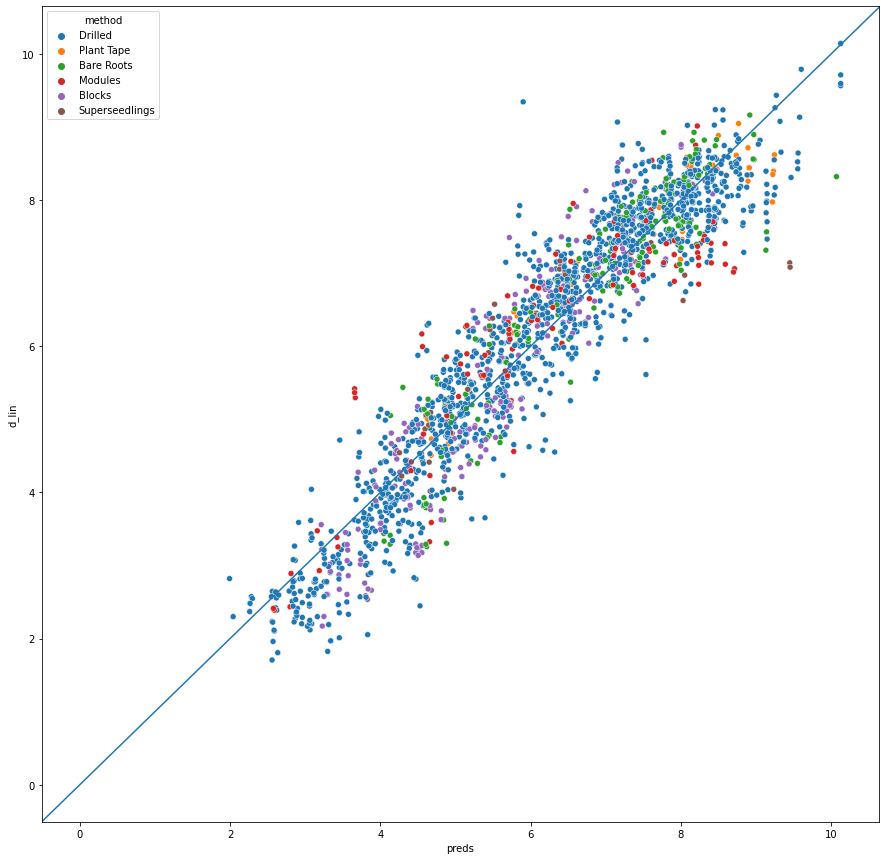

In [27]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()


In [28]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,pp2m2,-0.041254
1,organic_matter,0.459348
2,heat_units,0.781753
3,solar_radiation,1.502582
4,protection_Fleece,0.145345
5,protection_None,0.094658
6,protection_Poly,0.197498
7,method_Blocks,-0.508271
8,method_Drilled,-1.801045
9,method_Modules,-0.066156


In [29]:
X_1 = summary_data_avg.drop(['d_lin',
                             'mean_diameter',
                             'std_dev_diameter',
                             'fieldzonedate',
                             'sample_date',
                             'planting_date',
                             'preds',
                             'sand',
                             'silt',
                             'clay',
                             'fieldzone'], axis = 1)

X_1['growth_units'] = X_1['solar_radiation']*X_1['heat_units']

X_1 = X_1.drop(['heat_units',
                'solar_radiation'], axis = 1)

y_1 = summary_data_avg['mean_diameter']

In [30]:
X_1 = pd.get_dummies(X_1, columns = ['method',
                                     'inputs',
                                     'variety'], drop_first = True)

In [31]:
X_1_scaled = scaler.fit_transform(X_1)

reg = LinearRegression().fit(X_1_scaled, y_1)
preds = reg.predict(X_1_scaled)

summary_data_avg['preds'] = preds

reg.score(X_1_scaled, y_1)

0.8205822983909468

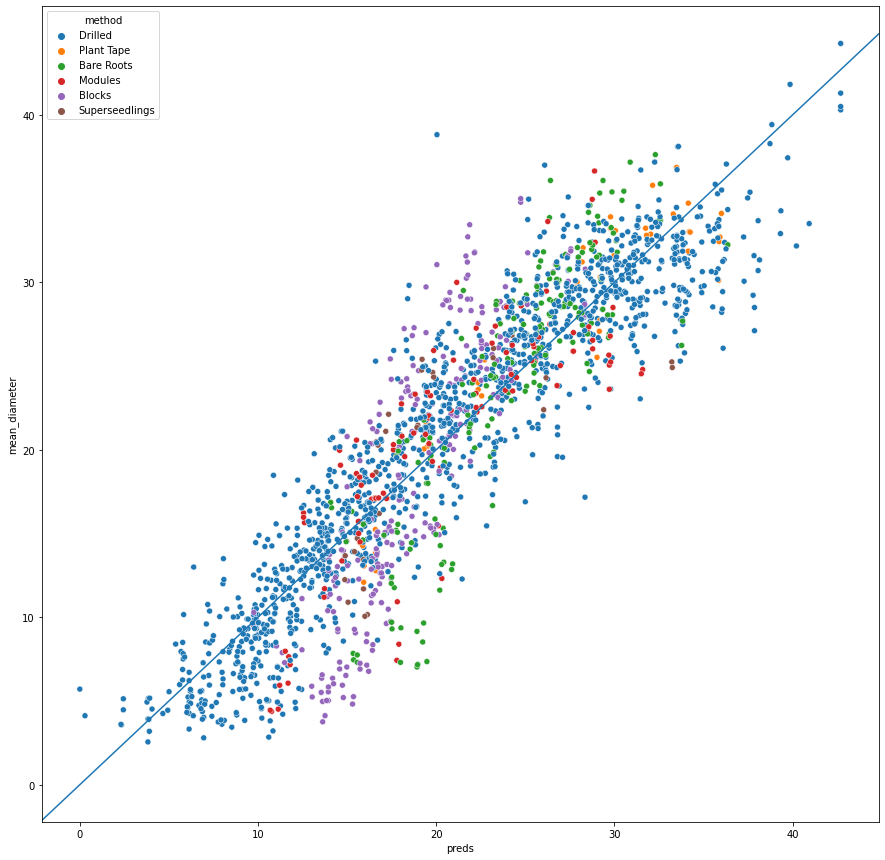

In [32]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'mean_diameter', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()

In [33]:
coef_list = list(reg.coef_)
var_list = list(X_1)

reg_coef_df = pd.DataFrame({'variable': var_list, 'coef': coef_list}, columns=['variable', 'coef'])

reg_coef_df

,variable,coef
0,pp2m2,-0.247200
1,organic_matter,2.351841
2,protection_Fleece,0.568421
3,protection_None,0.449459
4,protection_Poly,0.983431
5,growth_units,10.150142
6,method_Blocks,-2.689019
7,method_Drilled,-7.364903
8,method_Modules,-0.411843
9,method_Plant Tape,-0.898871


In [34]:
def average_count(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    average_count = df['pp2m2'].mean()
    
    return average_count

average_count('Allans 071')

43.75

In [35]:
def max_sample_date(fieldzone):
    
    df = summary_data[summary_data['fieldzone']==fieldzone]
    max_sample_date = df['sample_date'].max()
    
    return max_sample_date

max_sample_date('Allans 071')

Timestamp('2020-01-13 00:00:00')

In [36]:
def max_mean_diameter(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_mean_diameter = df['mean_diameter'].max()
    
    return max_mean_diameter

max_mean_diameter('Allans 071')

38.28333333333334

In [37]:
def max_solar(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_solar = df['solar_radiation'].max()
    
    return max_solar

max_solar('Allans 071')

791533

In [38]:
def max_heat(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_heat = df['heat_units'].max()
    
    return max_heat

max_heat('Allans 071')

2144

In [39]:
zone_data['avg_pp2m2'] = 0.0
zone_data['max_sample_date'] = 0
zone_data['max_mean_diameter'] = 0.0
zone_data['max_heat'] = 0.0
zone_data['max_solar'] = 0.0
zone_data['remaining_heat'] = 0.0
zone_data['remaining_solar'] = 0.0

for i in zone_data.index:
    
    clear_output(wait=True)
    
    fieldzone = zone_data['fieldzone'][i]
    zone_data['avg_pp2m2'][i] = average_count(fieldzone)
    zone_data['max_sample_date'][i] = max_sample_date(fieldzone)
    zone_data['max_mean_diameter'][i] = max_mean_diameter(fieldzone)
    zone_data['max_heat'][i] = max_heat(fieldzone)
    zone_data['max_solar'][i] = max_solar(fieldzone)
    start = zone_data['max_sample_date'][i]
    finish = zone_data['est_harvest_date'][i]
    zone_data['remaining_heat'][i] = cum_heat_units(start, finish, weather_data_avg)
    zone_data['remaining_solar'][i] = cum_solar_radiation(start, finish, weather_data_avg)   
    
    print("Current Progress:", np.round(i/len(zone_data)*100,0),"%")

Current Progress: 100.0 %


In [40]:
zone_data = zone_data.dropna()
zone_data

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,fieldzone,avg_pp2m2,max_sample_date,max_mean_diameter,max_heat,max_solar,remaining_heat,remaining_solar
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,Allans 071,43.750000,2020-01-13 00:00:00,38.283333,2144.0,791533.0,0.000000,0.000000
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2019,Allans 072,42.750000,2020-01-13 00:00:00,39.421053,2144.0,791533.0,0.000000,0.000000
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,15/12/2019,Allans 073,44.500000,2020-01-13 00:00:00,31.232558,2144.0,791533.0,0.000000,0.000000
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,15/12/2019,Allans 074,45.750000,2020-01-13 00:00:00,33.446809,2144.0,791533.0,0.000000,0.000000
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,15/12/2019,Allans 075,44.333333,2020-01-20 00:00:00,31.666667,2151.0,795766.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Lords Ground 69/Tims,4,2021-04-14,Shafton,Blocks,Conventional,None,197680,5,68,27,47.8,28/07/2021,Lords Ground 69/Tims4,32.000000,2021-06-07 00:00:00,6.774194,368.0,232955.0,611.770327,226514.142857
606,Martin F10A,1,2021-03-22,Krypton,Superseedlings,Organic,Fleece,197680,39,36,25,8.2,24/07/2021,Martin F10A1,25.000000,2021-06-09 00:00:00,10.160000,472.0,314843.0,534.790707,200569.303571
607,Martin F10A,2,2021-03-22,Krypton,Superseedlings,Organic,Fleece,197680,39,36,25,8.2,25/07/2021,Martin F10A2,34.000000,2021-06-09 00:00:00,13.441176,472.0,314843.0,549.456183,204688.446429
608,Martin F10A,3,2021-04-02,Shafton,Superseedlings,Organic,Fleece,197680,39,36,25,8.2,26/07/2021,Martin F10A3,36.000000,2021-06-09 00:00:00,11.694444,436.0,283432.0,564.206183,209299.446429


In [41]:
def filter_data(data, method, inputs, variety):
    
    filtered = data[data['variety'].str.contains(variety)]
    filtered = filtered[filtered['inputs'].str.contains(inputs)]
    filtered = filtered[filtered['method'].str.contains(method)]
    
    return filtered

In [42]:
def predict_weather(start, finish, variable):
    
    df = weather_data_avg.loc[(weather_data_avg['date'] > start) & (weather_data_avg['date'] < finish), [variable]]
    pred_hu = df[variable].sum()
    
    return pred_hu

start = datetime(year=2021, month=6, day=2, hour=13, minute=14, second=31)
finish = datetime(year=2022, month=6, day=2, hour=13, minute=14, second=31)

predict_weather(start, finish, 'rain')

537.8178571428571

In [43]:
zone_data['estimated_mean_diameter'] = 0.0
zone_data['estimated_standard_deviation'] = 0.0

for i in zone_data.index:
    method = zone_data['method'][i]
    inputs = zone_data['inputs'][i]
    variety = zone_data['variety'][i]
    protection = zone_data['protection'][i]

    df = filter_data(summary_data_avg, method, inputs, variety)
    X = df[['solar_radiation', 'heat_units', 'pp2m2', 'organic_matter', 'protection_Fleece', 'protection_None', 'protection_Poly']]
    # 'sand', 'silt', 'clay',
    y_dl = df['d_lin']
    y_sd = df['std_dev_diameter']

    X_scaled = scaler.fit_transform(X)

    reg_dl = LinearRegression().fit(X_scaled, y_dl)
    reg_sd = LinearRegression().fit(X_scaled, y_sd) 
    
    #pred = reg.predict(X2_scaled)
    
    print(f'{i} - {reg_dl.score(X_scaled, y_dl):.2f} - {reg_sd.score(X_scaled, y_sd):.2f}')

0 - 0.90 - 0.77
1 - 0.90 - 0.77
2 - 0.86 - 0.71
3 - 0.86 - 0.71
4 - 0.96 - 0.75
5 - 0.96 - 0.75
6 - 0.86 - 0.71
7 - 0.86 - 0.71
8 - 0.86 - 0.71
9 - 0.86 - 0.71
10 - 0.96 - 0.87
11 - 0.96 - 0.75
12 - 0.96 - 0.75
13 - 0.89 - 0.77
14 - 0.89 - 0.77
15 - 0.96 - 0.87
16 - 0.96 - 0.87
17 - 0.96 - 0.87
18 - 0.96 - 0.87
19 - 0.96 - 0.87
20 - 0.96 - 0.87
21 - 0.96 - 0.87
22 - 0.89 - 0.77
23 - 0.89 - 0.77
26 - 0.90 - 0.77
27 - 0.90 - 0.77
30 - 0.90 - 0.77
31 - 0.90 - 0.77
32 - 0.90 - 0.77
33 - 0.90 - 0.77
34 - 0.90 - 0.77
35 - 0.90 - 0.77
36 - 0.90 - 0.77
37 - 0.89 - 0.77
38 - 0.89 - 0.77
39 - 0.97 - 0.77
40 - 0.97 - 0.77
41 - 0.97 - 0.77
42 - 0.97 - 0.77
43 - 0.96 - 0.87
44 - 0.96 - 0.87
45 - 0.96 - 0.87
46 - 0.96 - 0.87
47 - 0.97 - 0.77
48 - 0.97 - 0.77
49 - 0.97 - 0.77
50 - 0.97 - 0.77
51 - 0.95 - 0.78
52 - 0.95 - 0.78
53 - 0.95 - 0.78
54 - 0.95 - 0.78
55 - 0.94 - 0.81
56 - 0.94 - 0.81
57 - 0.94 - 0.81
58 - 0.94 - 0.81
59 - 0.95 - 0.78
60 - 0.95 - 0.78
61 - 0.95 - 0.78
62 - 0.95 - 0.78
63 - 0.

c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


233 - 0.99 - 0.86
234 - 0.99 - 0.86
235 - 0.88 - 0.74
236 - 0.88 - 0.74
237 - 0.94 - 0.84
238 - 0.94 - 0.84
239 - 0.96 - 0.80
240 - 0.96 - 0.80
241 - 0.96 - 0.80
242 - 0.96 - 0.80
243 - 0.96 - 0.80
244 - 0.96 - 0.80
245 - 0.93 - 0.90
246 - 0.93 - 0.90
247 - 0.93 - 0.90
248 - 0.93 - 0.90
249 - 0.88 - 0.82
250 - 0.88 - 0.82
251 - 0.88 - 0.82
252 - 0.88 - 0.82
253 - 0.93 - 0.90
254 - 0.93 - 0.90
255 - 0.93 - 0.90
256 - 0.89 - 0.99
257 - 0.89 - 0.77
258 - 0.96 - 0.87
259 - 0.96 - 0.87
260 - 0.96 - 0.87
261 - 0.96 - 0.87
265 - 0.94 - 0.70
266 - 0.94 - 0.70
267 - 0.99 - 0.64
268 - 0.99 - 0.64
269 - 0.94 - 0.84
270 - 0.94 - 0.84
271 - 0.89 - 0.77
272 - 0.89 - 0.77
273 - 0.89 - 0.77
274 - 0.89 - 0.77
275 - 0.89 - 0.77
276 - 0.89 - 0.77
277 - 0.89 - 0.77
278 - 0.89 - 0.77
279 - 0.89 - 0.77
280 - 0.89 - 0.77
281 - 0.89 - 0.77
282 - 0.99 - 0.95
283 - 0.99 - 0.95
284 - 0.86 - 0.71
285 - 0.86 - 0.71
286 - 0.86 - 0.71
287 - 0.90 - 0.77
288 - 0.90 - 0.77
289 - 0.90 - 0.77
290 - 0.90 - 0.77
291 - 0.90